# P7 Chapter 2 The CEDA Members #

## Thesis Chapter 6 Section 6.6 ## 

File name: jnb_hddt_sql_tables

### Install necessary resources ###

In [1]:
import pandas as pd

import csv

# First call the sql tables as they appear in the database (Part One)

ceda = pd.read_csv ('ceda_202107151833.csv')
club = pd.read_csv ('club_202107151833.csv')
location = pd.read_csv ('location_202107151833.csv')
person_ceda = pd.read_csv ('m2m_person_ceda_202107151835.csv')
person_club = pd.read_csv ('m2m_person_club_202107151835.csv')
person_location = pd.read_csv ('m2m_person_location_202107151835.csv')
person_occupation = pd.read_csv ('m2m_person_occupation_202107151836.csv')
person_person = pd.read_csv('m2m_person_person_202107151836.csv')
person_religion = pd.read_csv ('m2m_person_religion_202107151836.csv')
person_society = pd.read_csv ('m2m_person_society_202107151836.csv')
occupation = pd.read_csv ('occupation_202107151834.csv')
person = pd.read_csv ('person_202107151834.csv')
religion = pd.read_csv ('religion_202107151834.csv')
society = pd.read_csv('society_202107151834.csv')

# next call the sql tables rendered in Gephi format (Part Two)

# call all Names

gephi_all_names = pd.read_csv ('vw_2_all_bipartite_memberships_202107121854.csv')
gephi_names_notceda = pd.read_csv ('vw_2_all_bipartite_memberships_xceda_202107121855.csv')

# Then call all Tuples (Source and Target)

gephi_person_ceda = pd.read_csv ('vw_2_ceda_membership_202107121855.csv')
gephi_person_club = pd.read_csv ('vw_2_club_membership_202107121855.csv')
gephi_person_location = pd.read_csv ('vw_2_location_membership_202107121856.csv')
gephi_person_occupation = pd.read_csv ('vw_2_occupation_membership_202107121856.csv')
gephi_person_person = pd.read_csv('vw_2_person_person_relationships_202107161545.csv')
gephi_person_religion = pd.read_csv ('vw_2_religion_membership_202107121856.csv')
gephi_person_society = pd.read_csv ('vw_2_society_membership_202107121858.csv')

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})

plt.rc('figure', figsize=(20, 10))

import numpy as np

# 7.4.1 Introduction #

The Historical Data Digital Toolkit (HDDT) comprises of data extracted from one or more ordered datasets (which can be data sourced from several archives). Mulitple donor datasets must share a common data field to enable datasets from multiple donors to be linked together (combined). For this project the common data field is a person's name. Data extracted from the RAI, QFHS and my own research (at RAI and Friends House, London), produced records where each record provided data about a person. All of the persons in this project were members of the Centres for the Emergence of the Discipline of Anthropology in Britain 1830 to 1870 (the CEDA).

Collected data (after cleaning and combining) was then rendered as CSV sheets and these were used to creatre SQL database tables. 

The person columns 'Family Name' and 'First Names' in the database are common to all datatables. Therefore the person table is the 'master' table (all persons recorded have a unique ID, and authority index concerns were resolved by accepting the RAI dataset as the project authority index). Attributable data was then attached to the person table (such as date of birth).

Other related data items are captured in relatable tables and all relatable tables have a shared structure ('id', 'name', 'notes'). 

m2m tables were then built linking the person data table to related datatables. m2m tables allow for many to many realtionships. 

Note: The m2m_person_ceda table includes the attributable data 'first_year' and 'last_year'.

The person_person table will generate social network graphs, all other m2m_tables will generate bipartite graphs (bigraphs).

# 7.4.2 The Entity Relationship Diagram #

<img src="ERD.png"> 

# 7.4.3 ERD statistics #

## 6 CEDA Societies: ##

1. QCA Quaker Committee on the Aborigines, 31 members.
2. APS Aborigines Protection Society, 1171 members.
3. ESL Ethnological Society of London, 748 members.
4. ASL Anthropological Society of London, 1334 members.
5. AI Anthropological Institute. 610 members.

## 514 attribute types: ##

- ceda (6)
- club (68)
- location (83)
- occupation (93)
- person (3095)
- suffix (155)
- religion (4) Only one group is present, 1 = Quaker.
- society (260)

## 12097 relationships ##

- m2m_person_ceda (3894) 
- m2m_person_club (323) 
- m2m_person_location (2061) 
- m2m_person_occupation (1883)
- m2m_person_person (2099)
- m2m_person_religion (593) 
- m2m_person_society (1238) 
- m2m_person_suffix (1351) *Not used in this project*

# 7.4.4 The structure and dimensions of all SQL tables #

| Table | Rows | Columns
| --- | --- | --- |
| ceda | 6 | 1 |
| person_ceda | 3894 | 4 |
| club | 68 |1 |
| person_club | 323 | 2 |
| location   | 83 | 1 | 
| person_location | 2061 | 2 |
| occupation | 93 | 1 |
| person_occupation | 1883 | 2 |
| person | 3095 | 7 |
| person_person | 2099 | 3 |
| religion | 4 | 1 |
| person_religion | 593 | 3 |
| society | 260 | 1 |
| person_society | 1238 | 2|

Note:

Bipartite relationships = 9992 (+2099 person_person relationships = 12091 total relationships)

# 7.4.5 The CEDA #

## code cells ##

In [2]:
ceda

,id,name,notes
0,1,QCA,NaN
1,2,APS,NaN
2,3,ESL,NaN
3,4,ASL,NaN
4,5,LAS,NaN
5,6,AI,NaN


In [3]:
person_ceda

,id,person_id,ceda_id,first_year,last_year,notes
0,1,5,3,1844,1844,NaN
1,2,7,3,1844,1844,NaN
2,3,8,3,1858,1871,NaN
3,4,12,3,1860,1871,NaN
4,5,14,3,1843,1845,NaN
...,...,...,...,...,...,...
3889,4096,3415,2,1839,1850,NaN
3890,4097,3416,2,1861,1862,NaN
3891,4098,3417,2,1853,1856,NaN
3892,4099,3418,2,1840,1840,NaN


# 7.4.6 All CEDA members' relationships visualisation #

<img src="bipartite_pick.png"> 

The graph above shows all of the popular bigraph data in the database. Including all data result in a 'hairball' because the network is too dense to be capable of analysis at this (thehighest) level. 

1850 members of the community are recorded as members of 35 popular entities (Locations, occupations, societies and the Athenaeum Club). These entities make a sphere of popular interest graph where meetings between members concerning the CEDA may have taken place, equally they may also be places where members might meet up only infrequently or informally. 

The visual analysis of connectivity between members in single societies and between members of multiple societies indicates the extent that the community is societally connected. The 1850 make up 60% of the entire community. 

# 7.4.7 All persons are members of at least one CEDA society #

<img src="ceda.png"> 

# 7.4.8 Memberships in each CEDA table #

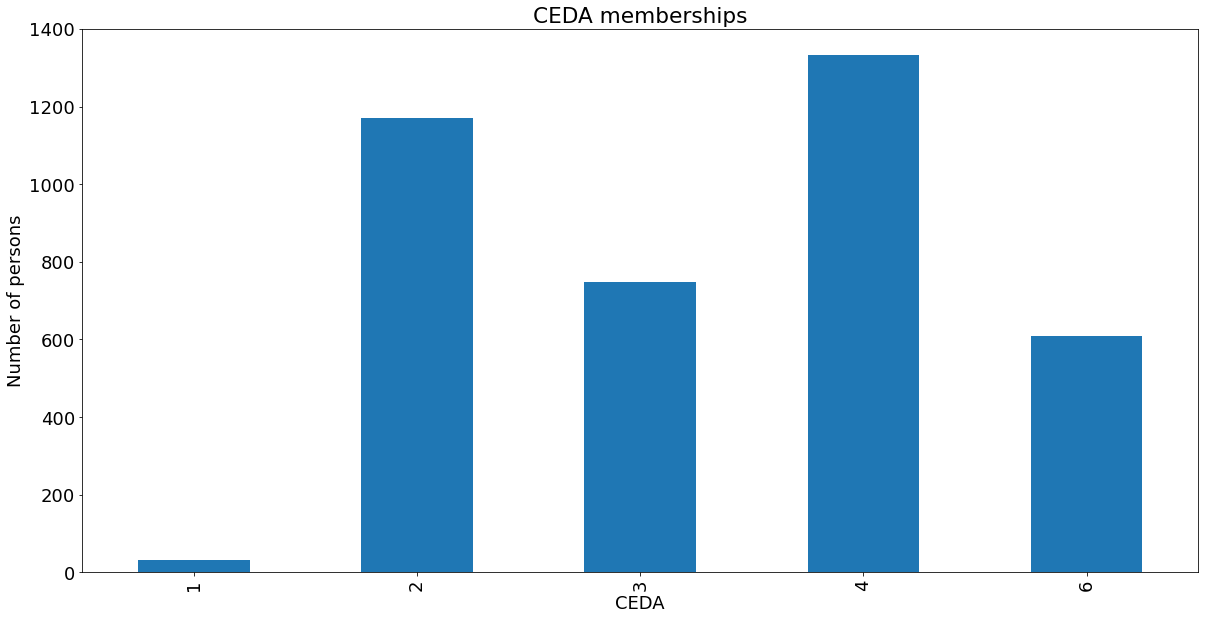

In [4]:
person_ceda.groupby('ceda_id')['person_id'].nunique().plot(kind='bar')
plt.title ("CEDA memberships")
plt.xlabel ("CEDA")
plt.ylabel ("Number of persons")
plt.show()

### Chart (above) Memberships by CEDA society. - 1 QCA, - 2 APS, - 3 ESL, - 4 ASL, - 6 AI ###
Note: 5 - LAS data has not been collected by the RAI archivists

# 7.4.9 CEDA members were also members of 68 clubs #

In [5]:
club

,id,name,notes
0,2,Athenaeum Club,NaN
1,3,Marlborough Club,NaN
2,4,Carlton Club,NaN
3,5,Oriental Club,NaN
4,6,National Club,NaN
...,...,...,...
63,65,Royal Albert Yacht Club,NaN
64,66,Berwickshire Naturalists Field Club,NaN
65,67,Indian Club,NaN
66,68,Ad Eundem,NaN


In [6]:
person_club

,id,person_id,club_id
0,1,7,2
1,2,22,2
2,3,33,2
3,4,33,3
4,5,33,4
...,...,...,...
318,356,2163,5
319,357,2196,2
320,358,2214,4
321,359,2223,2


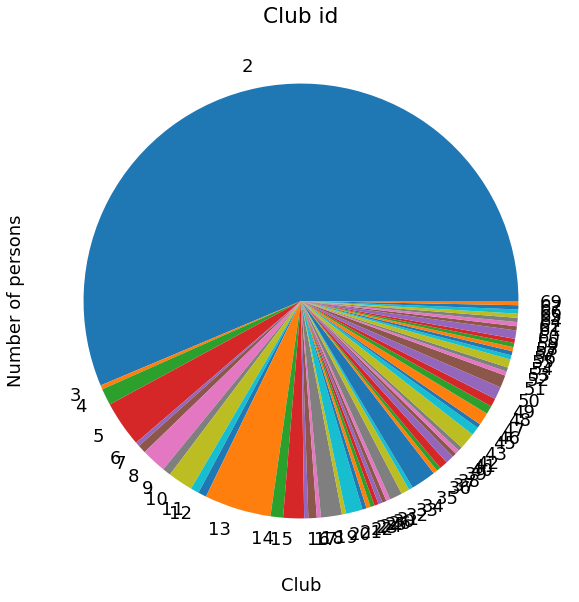

In [7]:
person_club.groupby('club_id')['person_id'].nunique().plot(kind='pie')
plt.title ("Club id")
plt.xlabel ("Club")
plt.ylabel ("Number of persons")
plt.show()

The Athaneum Club membrship (2) exceeds that of all other clubs combined.

Note - ignore clubs outside of the top 5?

<img src="club.png"> 

Clubs will not be analysed in this project but the Athenaeum club can be used as an attribute (because it is a singularity).

# 7.4.10 CEDA members are identified with 83 locations #

In [8]:
location

,id,name,notes
0,1,London,NaN
1,3,country,NaN
2,4,Africa,NaN
3,5,America,NaN
4,6,Scotland,NaN
...,...,...,...
78,80,Madagascar,NaN
79,81,Ecuador,NaN
80,82,Seychelles,NaN
81,83,Panama,NaN


In [9]:
person_location

,id,person_id,location_id
0,1,1,1
1,2,3,3
2,3,4,4
3,4,6,1
4,5,8,1
...,...,...,...
2056,2257,2255,1
2057,2259,2258,3
2058,2260,2259,83
2059,2261,2260,84


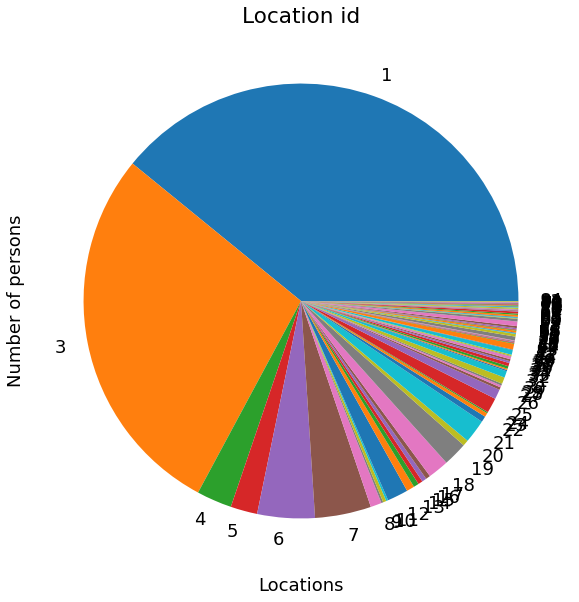

In [10]:
person_location.groupby('location_id')['person_id'].nunique().plot(kind='pie')
plt.title ("Location id")
plt.xlabel ("Locations")
plt.ylabel ("Number of persons")
plt.show()

| Location ID | location  | Count |
| ----------- | --------- | ----- |
| 1           | London    | 806   |
| 3           | country   | 578   |
| 6           | Scotland  | 88    |
| 7           | India     | 86    |
| 4           | Africa    | 54    |
| 5           | America   | 41    |
| 19          | Germany   | 37    |
| 21          | France    | 36    |
| 12          | Ireland   | 32    |
| 18          | Australia | 32    |
| 25          | Wales     | 23    |

### Locations table. Note: London, Country and Scotland equal 1472, more than 50% of all locations ###

# 7.4.11 top 10 locations #

<img src="location10_pie.png"> 

# 7.4.12 Some persons are associated with mulitple locations # 

<img src="location10_bigraph.png"> 

We can see that London and 'country'(sic) are the most populated locations. Because the 'country' location is an aggregate (and not a specific location) we can think of London and 'country' as a twin centre. Within the twin centre we can see the members of both London and 'country' locations and that the members of each are highly networked. We can also see that the London location contains many members who have no association with any other group (including 'country'). London 1830 - 1870, was densely populated and so it is possible that members of the London location had other modes of association. Because the 'country' location is an aggregate we cannot make the same analysis to the same extent, it is possible that many members in (say) Newcastle had no association with other members in (say) Bristol. We can see the large group of members who were members of both London and 'country' locations. It is highly likely that these members served as conduits of communication and group cohesion. It is interesting to note that only 3 members of this London and 'country' group were members of groups outside of the twin centre.

Eight other location each have a membership of around 30 members (we can call these the satellites), all of the satellite groups relate directly to the twin centre with very few members associated with more that one satellite location.

Australia and Ireland have associations with both London and 'country'. The German location is most closely associated with the 'country' group. All of the other locations are strongly associated with the London location. 

Germany (far right) is the location least associated with London. Alex Nidda Genthe is the only member from Germany who is also a member of the London location. Friedrich Max Muller, Frederick Augustus Haverick and Gustav Oppert each network with 'country' members. William Wilson Hunter is the only 'country' member who also appears in the Germany location. He and Gustav oppert also have a location connection with India. 

# 7.4.13 CEDA members occupations #

In [11]:
occupation

,id,name,notes
0,1,literary,NaN
1,3,medical,NaN
2,4,armed services,NaN
3,5,political,NaN
4,6,church,NaN
...,...,...,...
88,90,farmer,NaN
89,91,clockmaker,NaN
90,92,plant collector,NaN
91,93,private means,NaN


In [12]:
person_occupation

,id,person_id,occupation_id
0,1,1,1
1,2,3,3
2,3,3,4
3,4,5,5
4,5,8,3
...,...,...,...
1878,2122,2252,3
1879,2123,2253,3
1880,2124,2254,3
1881,2125,2255,16


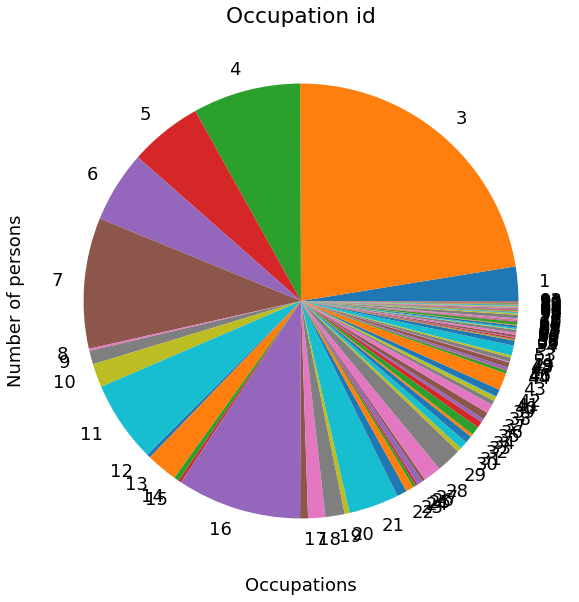

In [13]:
person_occupation.groupby('occupation_id')['person_id'].nunique().plot(kind='pie')
plt.title ("Occupation id")
plt.xlabel ("Occupations")
plt.ylabel ("Number of persons")
plt.show()

| Occupation ID | occupation | Number |
|----|---|---|
| 3 |medical | 424 |
| 7 | | academic | 183 |
| 16 | business | 174 |
| 4 | armed services | 151 |
| 11 | legal | 114 |
| 5 | political | 102 |
| 6 | church | 100 |
| 21 | aristocracy | 70 |
| 1 | literary | 48 |
| 13 | diplomacy | 44 |
| 29 | administrative | 35 |

Table - The top 11 occupations

# 7.4.14 the top 10 Occupations #

<img src="occupation10_pie.png"> 

# 7.4.15 Some members have more than one occupation #

<img src="occupation10_bigraph.png"> 

We can see that 'medical','academic' and 'armed services' together account for half of the members by occupation. We can also see that the largest three occupational categories each contain many members who have no association with any other occupational group. We can see that the medical categories contain many members who are also members of the other two principal categories ('academic' and 'armed services'). It is highly likely that these members served as conduits of communication and group cohesion amongst the three principal occupational cegories. 

Seven other occupations each have a range of members with literary the lowest and business the highest. All of the satellite groups relate directly to the triple centre with many members also associated with more that one other satellite occupation.

It is surprising the the least networked occupation is 'church' and perhaps less so that 'business' and 'legal'are highly networked.

Several individuals form a web of interconnectedness between the members occupations. 

# 7.4.16 Society memberships #

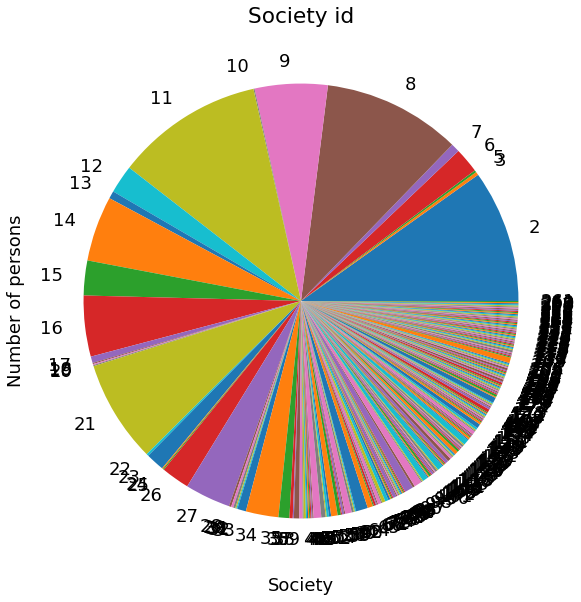

In [14]:
person_society.groupby('society_id')['person_id'].nunique().plot(kind='pie')
plt.title ("Society id")
plt.xlabel ("Society")
plt.ylabel ("Number of persons")
plt.show()

# 7.4.17 Top 10 Society memberships #

<img src="society10_pie.png"> 

# 7.4.18 Some CEDA members are members of multiple societies #

<img src="society10_bigraph.png"> 

We can see that 'Geological Society' and the 'Royal Goegraphical Society' together account for a significant number of members by society. The 'Royal College of Surgeons', the 'Medical and Chirurgical Society' and the 'College of Physicians' form the next largest cluster of memberships of societies. These two clusters each contain many members who have no association with any other society. We can see that the medical group and the geographical group have few members in common. The 'Royal Society' and the 'Linnean Society' in the centre have between them the greatest level of networking amongst all of the societies. It is highly likely that these members served as conduits of communication and group cohesion amongst the two principal society groups. 

Many other societies have a range of members all of whom are highly interconnected. All of the satellite groups relate most closely to the 'Royal Society' and the 'Linnean Society' rather than to the two larger clusters. Many members of the smaller satellite societies are also associated with more that one other satellite occupation.

It is surprising the the least networked occupation is the 'Royal College of Surgeons' and perhaps less so that the 'Geological Society' and the 'Royal Geographical Society' are highly networked.

Several individuals form a web of interconnectedness between the members of societies. 

# 7.4.19 All Quaker relationships #

In [15]:
person_person

,id,relationship_type_id,person1_id,person2_id
0,1,1,23,2346
1,2,1,2264,2346
2,3,1,2265,2547
3,4,1,2545,2547
4,5,1,2546,2547
...,...,...,...,...
2094,4373,3,2494,2496
2095,4374,3,2495,2579
2096,4376,3,2867,2868
2097,4378,3,2869,2871


<img src="quakers.png"> 

# 7.4.20 Quaker family relationships #

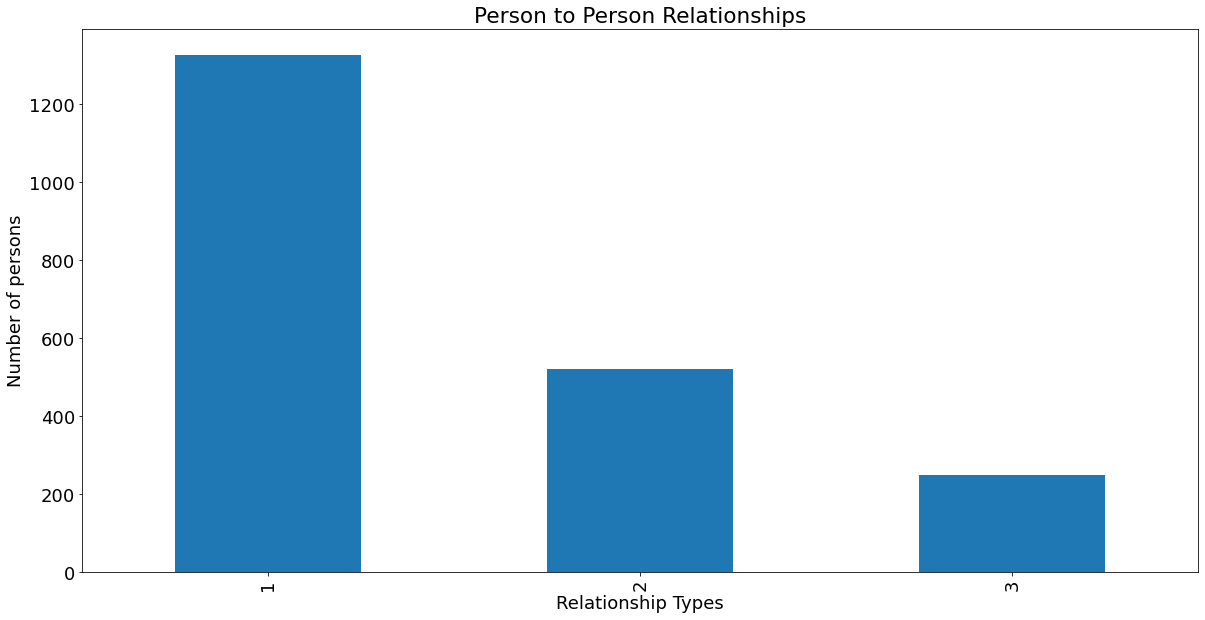

In [16]:
person_person.groupby('relationship_type_id')['id'].nunique().plot(kind='bar')
plt.title ("Person to Person Relationships")
plt.xlabel ("Relationship Types")
plt.ylabel ("Number of persons")
plt.show()

### Chart above Person to person relationships (Quakers only) ###

### Key - 1 = Distant relations, 2 = Close relations, 3 = Immediate relations ###

# 7.4.21 Quaker members of the CEDA #

<img src="quakers_ceda.png"> 

# 7.4.22 - All SQL relatable tables rendered in Gephi format #

## Rendering data in Gephi format ##

JNB uses NetworkX to generate GexF files for data to be used to produce graph files for network analysis in Gephi. Two files must be generated:

1. A file of 'Names' listing the names of all nodes to be used in a graph (These are 'persons' and all entities in related data tables, such as 'occupations'). Each row in a Names table must be unique and referenced in the 'Tuples' (or edges) table.

Note - For Names to be Gephi compliant the headers 'family_name' and 'first_names' must be combined into a single header  -'Names'.

2. A 'Tuples' (or edges) table made up of two columns of Names where the two Names are related. The first column must be headed 'Source' and the second column 'Target'.

'Names' and 'Tuples' tables can also have an 'id' column (if not then Gephi will assign one).

Note - Because 'Names', 'Source' and 'Target' are language names in Gephi capitalisation is important.

SQL views have been written to convert the data tables into Gephi standard.

In [17]:
gephi_all_names

,ID,Source,Target
0,1,Arthur William A Beckett,ASL
1,1,Arthur William A Beckett,London
2,1,Arthur William A Beckett,literary
3,3,Andrew Mercer Adam,ASL
4,3,Andrew Mercer Adam,armed services
...,...,...,...
9987,3415,x Wright,APS
9988,3416,W Wrigley,APS
9989,3417,James Yates,APS
9990,3418,John Young,APS


In [18]:
gephi_names_notceda

,ID,Source,Target
0,1,Arthur William A Beckett,London
1,1,Arthur William A Beckett,literary
2,3,Andrew Mercer Adam,armed services
3,3,Andrew Mercer Adam,country
4,3,Andrew Mercer Adam,medical
...,...,...,...
6093,2876,Joshua Wilson,Quaker
6094,2877,F Woodhead,Quaker
6095,2878,W Woolston,Quaker
6096,2879,Francis Wright,Quaker


In [19]:
gephi_person_ceda

,ID,Source,Target
0,5,William Adam,ESL
1,7,William (1) Adams,ESL
2,8,William (2) Adams,ESL
3,12,Louis Agassiz,ESL
4,14,Augustine Aglio,ESL
...,...,...,...
3889,3415,x Wright,APS
3890,3416,W Wrigley,APS
3891,3417,James Yates,APS
3892,3418,John Young,APS


In [20]:
gephi_person_club

,ID,Source,Target
0,7,William (1) Adams,Athenaeum Club
1,22,Rutherford Alcock,Athenaeum Club
2,33,William Amhurst Tyssen Amhurst,Athenaeum Club
3,33,William Amhurst Tyssen Amhurst,Marlborough Club
4,33,William Amhurst Tyssen Amhurst,Carlton Club
...,...,...,...
318,2163,James Whishaw,Oriental Club
319,2196,S W D Williams,Athenaeum Club
320,2214,William Smith Windham,Carlton Club
321,2223,Henry Drummond Wolff,Athenaeum Club


In [21]:
gephi_person_location

,ID,Source,Target
0,1,Arthur William A Beckett,London
1,3,Andrew Mercer Adam,country
2,4,H R Adam,Africa
3,6,Henry John Adams,London
4,8,William (2) Adams,London
...,...,...,...
2056,2255,James A Youl,London
2057,2258,Robert Younge,country
2058,2259,Arthur de Zeltner,Panama
2059,2260,x Zohrab,Armenia


In [22]:
gephi_person_occupation

,ID,Source,Target
0,1,Arthur William A Beckett,literary
1,3,Andrew Mercer Adam,medical
2,3,Andrew Mercer Adam,armed services
3,5,William Adam,political
4,8,William (2) Adams,medical
...,...,...,...
1878,2252,W Holt Yates,medical
1879,2253,James Yearsley,medical
1880,2254,Stephen Yeldham,medical
1881,2255,James A Youl,business


In [23]:
gephi_person_person

,id,Source,Target
0,1,William Aldam,x Fox
1,2,William Jun Aldam,x Fox
2,3,Frederick Alexander,R D Alexander
3,4,G W Alexander,R D Alexander
4,5,Henry Alexander,R D Alexander
...,...,...,...
2094,4373,Alfred Waterhouse,R Waterhouse
2095,4374,Mary Waterhouse,Paul Bevan
2096,4376,Lucy Westcombe,Thomas Westcombe
2097,4378,Benjamin Wheeler,Samuel Wheeler


In [24]:
gephi_person_religion

,ID,Source,Target
0,2233,William Spicer Wood,Quaker
1,2211,William Wilson,Quaker
2,2208,James Wilson,Quaker
3,2108,E T Wakefield,Quaker
4,1744,John Ross,Quaker
...,...,...,...
588,2876,Joshua Wilson,Quaker
589,2877,F Woodhead,Quaker
590,2878,W Woolston,Quaker
591,2879,Francis Wright,Quaker


In [25]:
gephi_person_society

,ID,Source,Target
0,8,William (2) Adams,Royal College of Surgeons
1,8,William (2) Adams,Pathological Society of London
2,8,William (2) Adams,Medical Society of London
3,8,William (2) Adams,Medical and Chirurgical Society of London
4,11,William Adlam,Somersetshire Archaeological and Natural Histo...
...,...,...,...
1233,2245,William Cort Wright,Manchester Literary and Philosophical Society
1234,2245,William Cort Wright,Chemical Society
1235,2252,W Holt Yates,Royal College of Physicians
1236,2258,Robert Younge,York Philosphical Society


### END ###